# **Breast Cancer Classification**
---
                                                                 Name : VISHNU E
                                                                 Organization : CognoRise InfoTech
                                                                 Date : 19/09/2024

## **Problem Statement**
---

Classify breast cancer tumors as malignant or benign using features
extracted from mammograms.

### Importing Libraries

In [43]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importing Dataset

In [44]:
df = pd.read_csv('Breast_cancer_data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### Exploratory Data Analysis

In [45]:
# summary of a dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [46]:
# statistical summary of the dataframe

df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [47]:
# checking for null values

df.isnull().sum()

,0
id,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0


In [48]:
# checking for duplicate values

duplicate_rows = df.duplicated(keep = False).sum()

print('Duplicate rows:')
duplicate_rows

Duplicate rows:


0

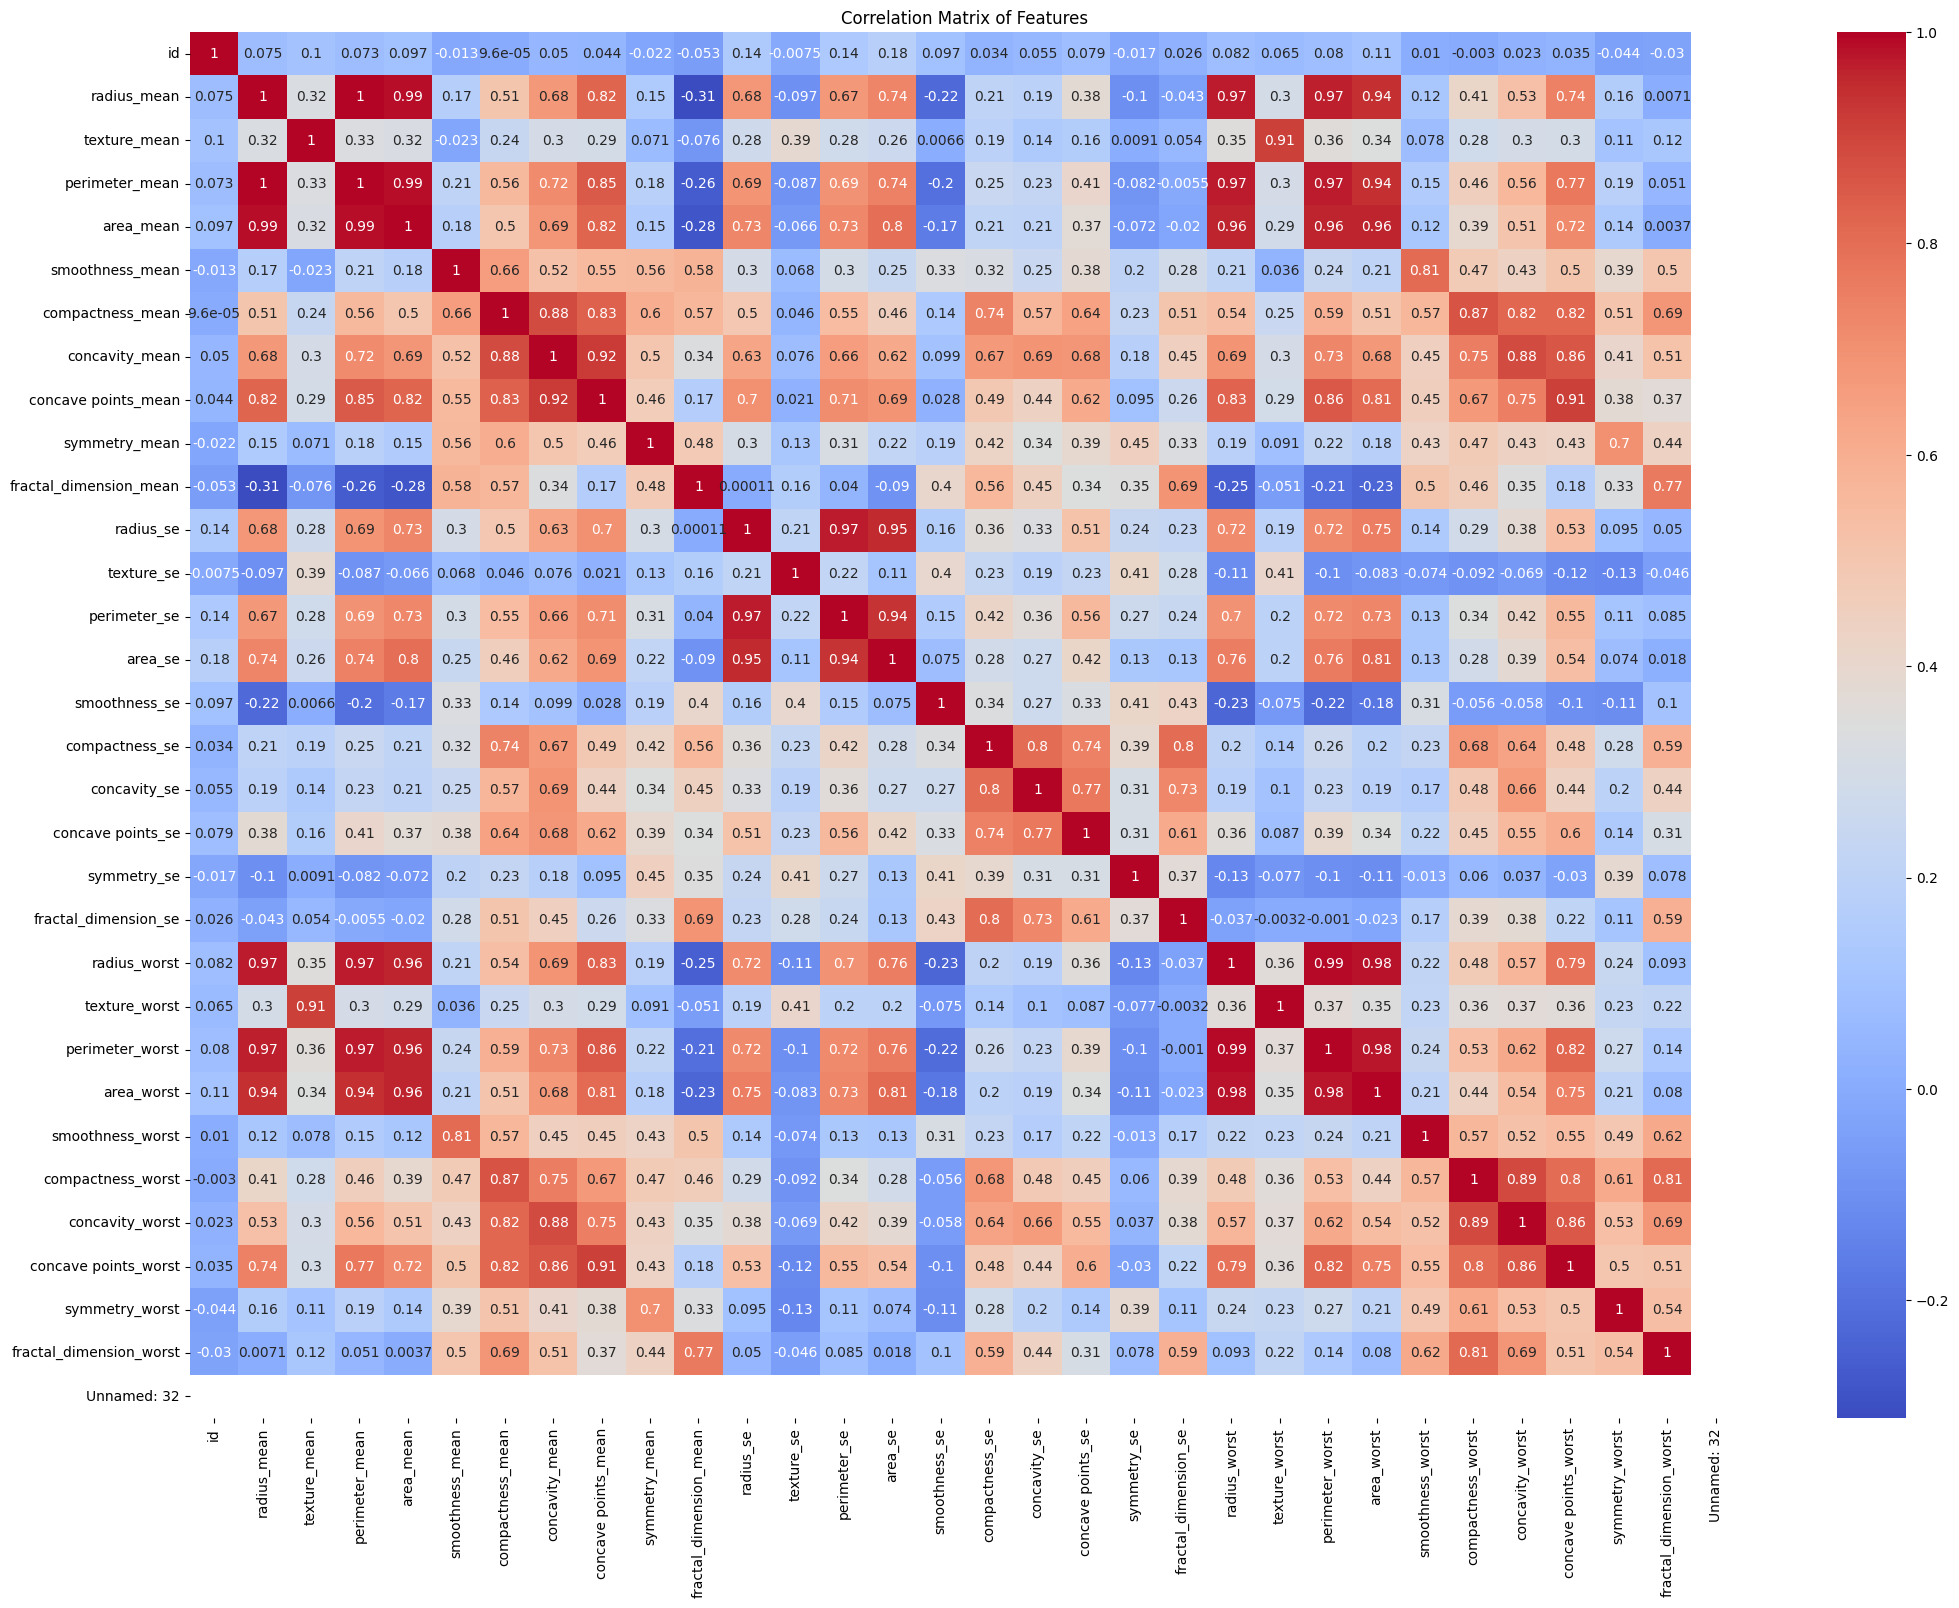

In [49]:
# correlation matrix

plt.figure(figsize=(25,18))
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

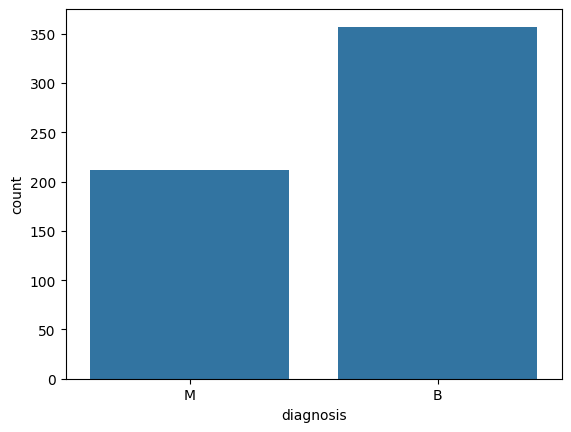

In [50]:
# target variable distribution

sns.countplot(x = 'diagnosis', data = df)
plt.show()

In [51]:
# sns.pairplot(df, hue = 'diagnosis')

In [52]:
# droping unwanted columns

df_new = df.drop(columns = ['id', 'Unnamed: 32'])
df_new

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


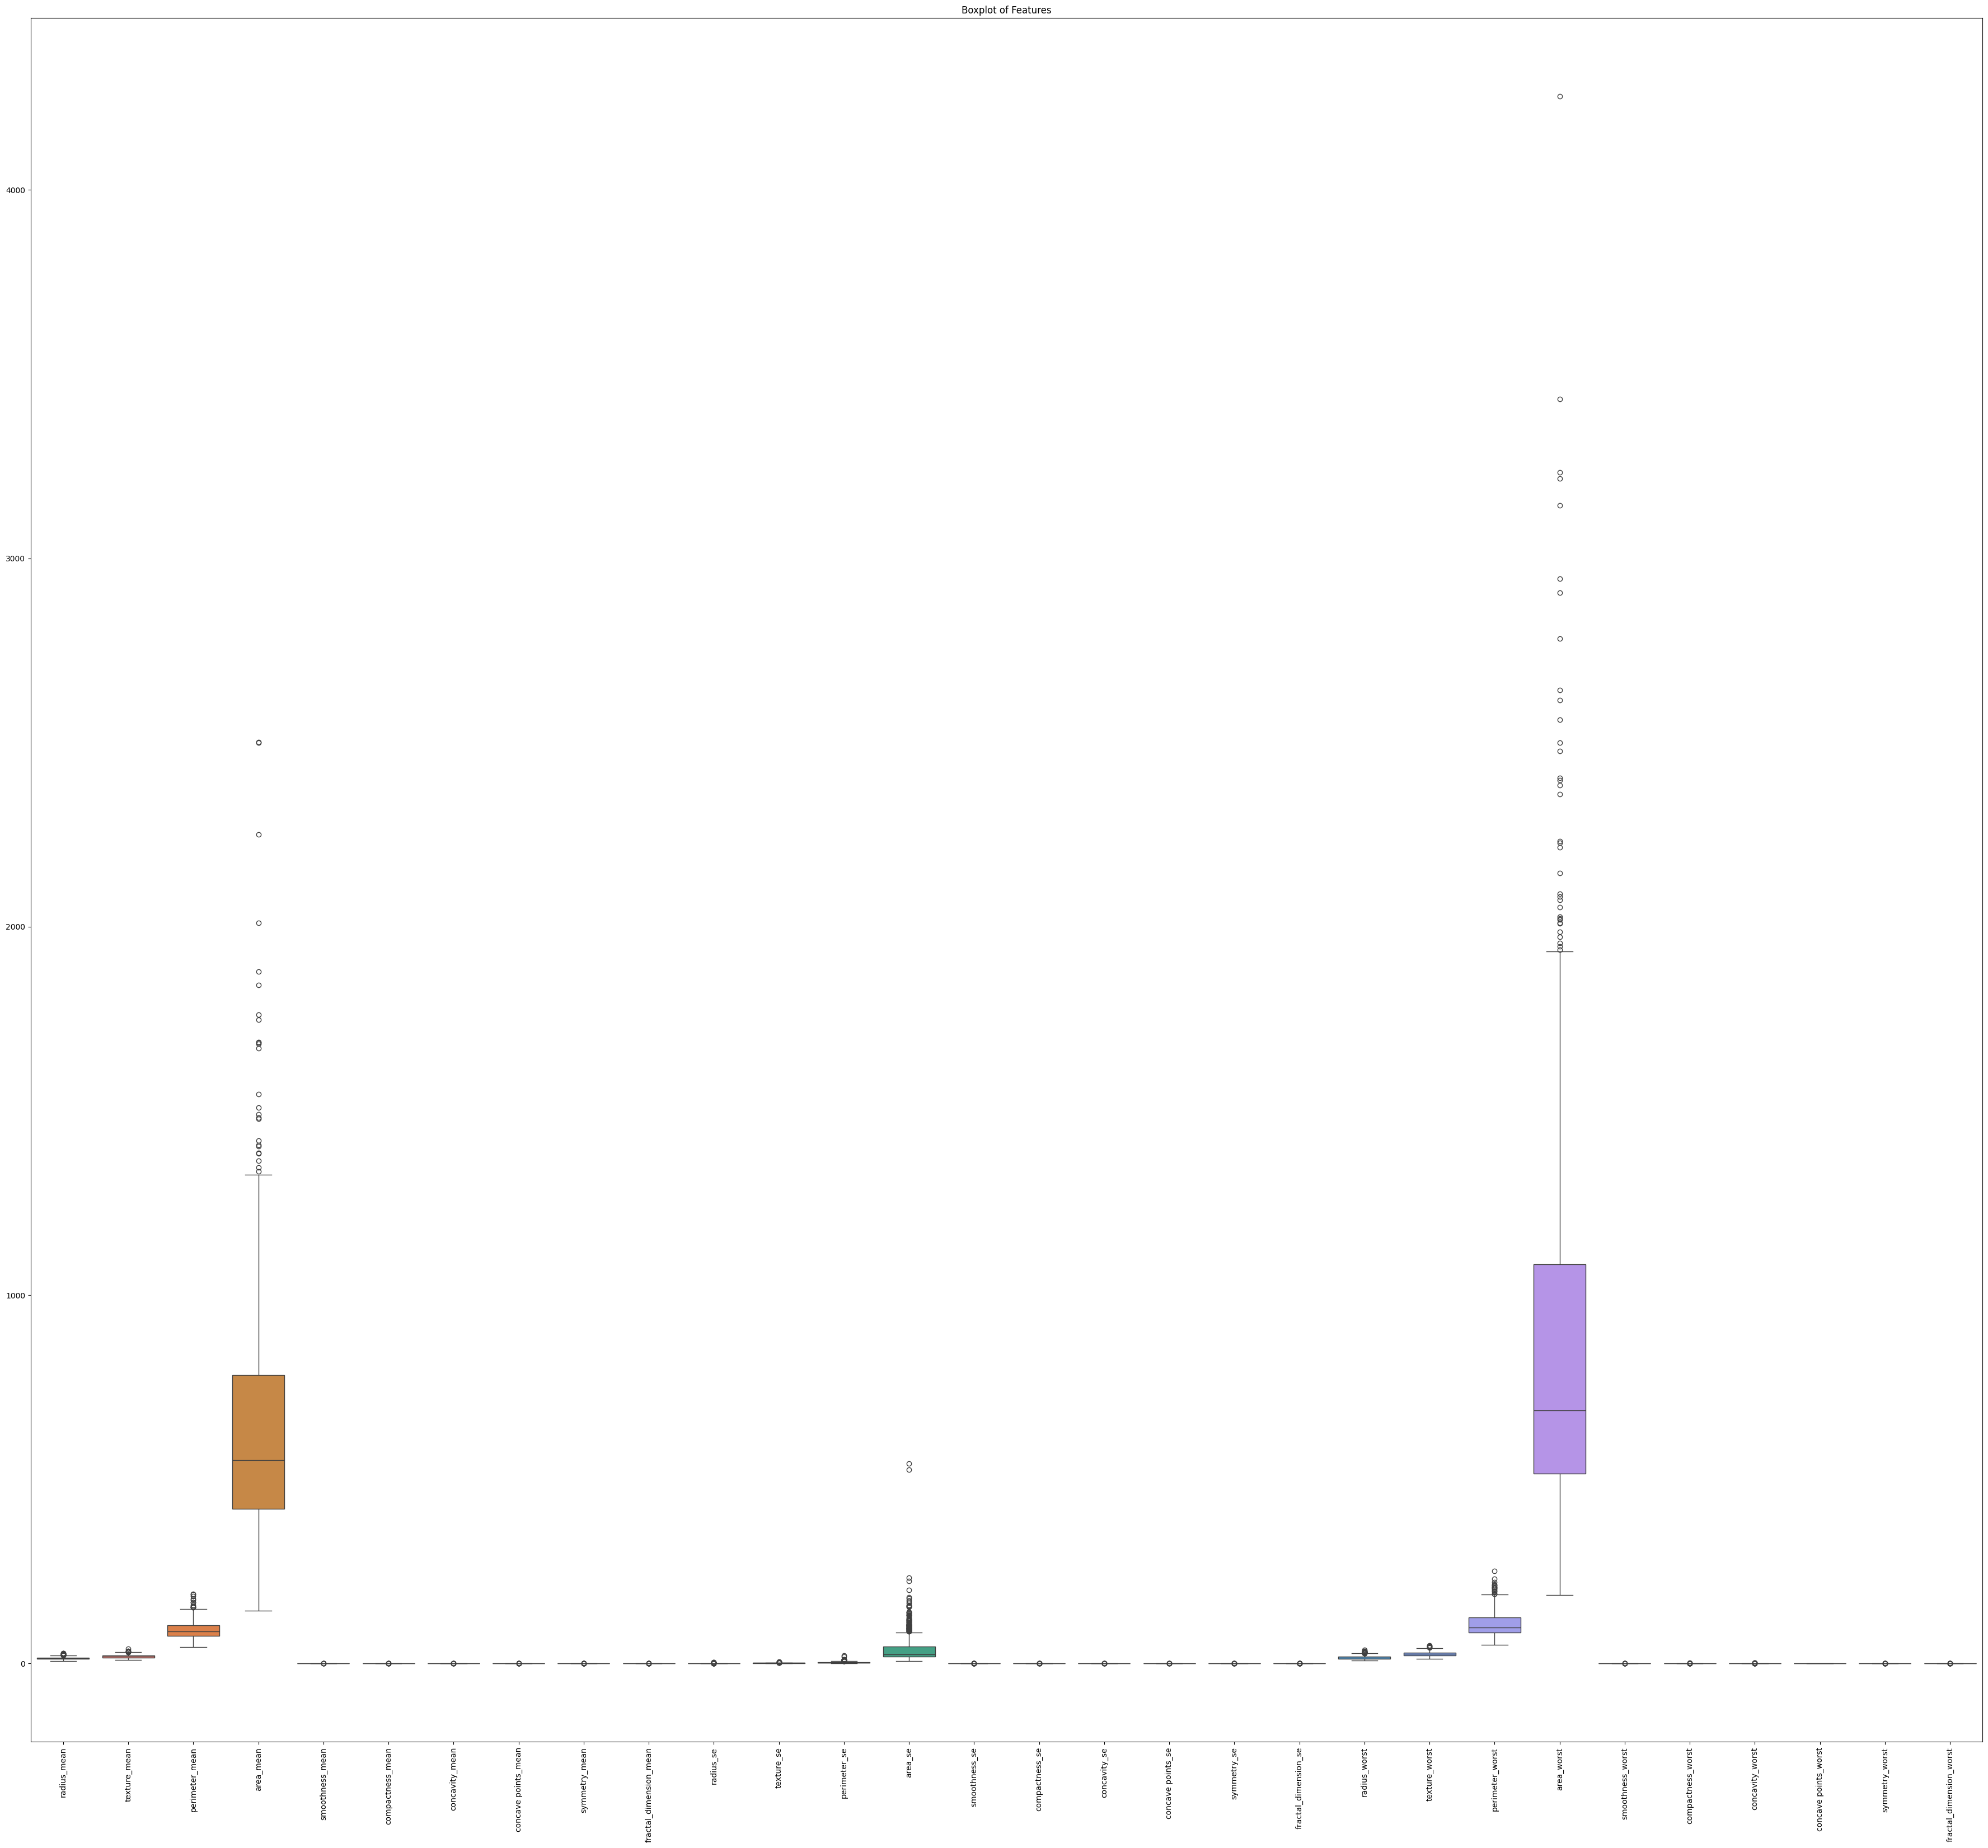

In [53]:
# Boxplot of features

plt.figure(figsize = (45,40))
plt.xticks(rotation=90)
plt.title("Boxplot of Features")
sns.boxplot(data = df_new)
plt.show()

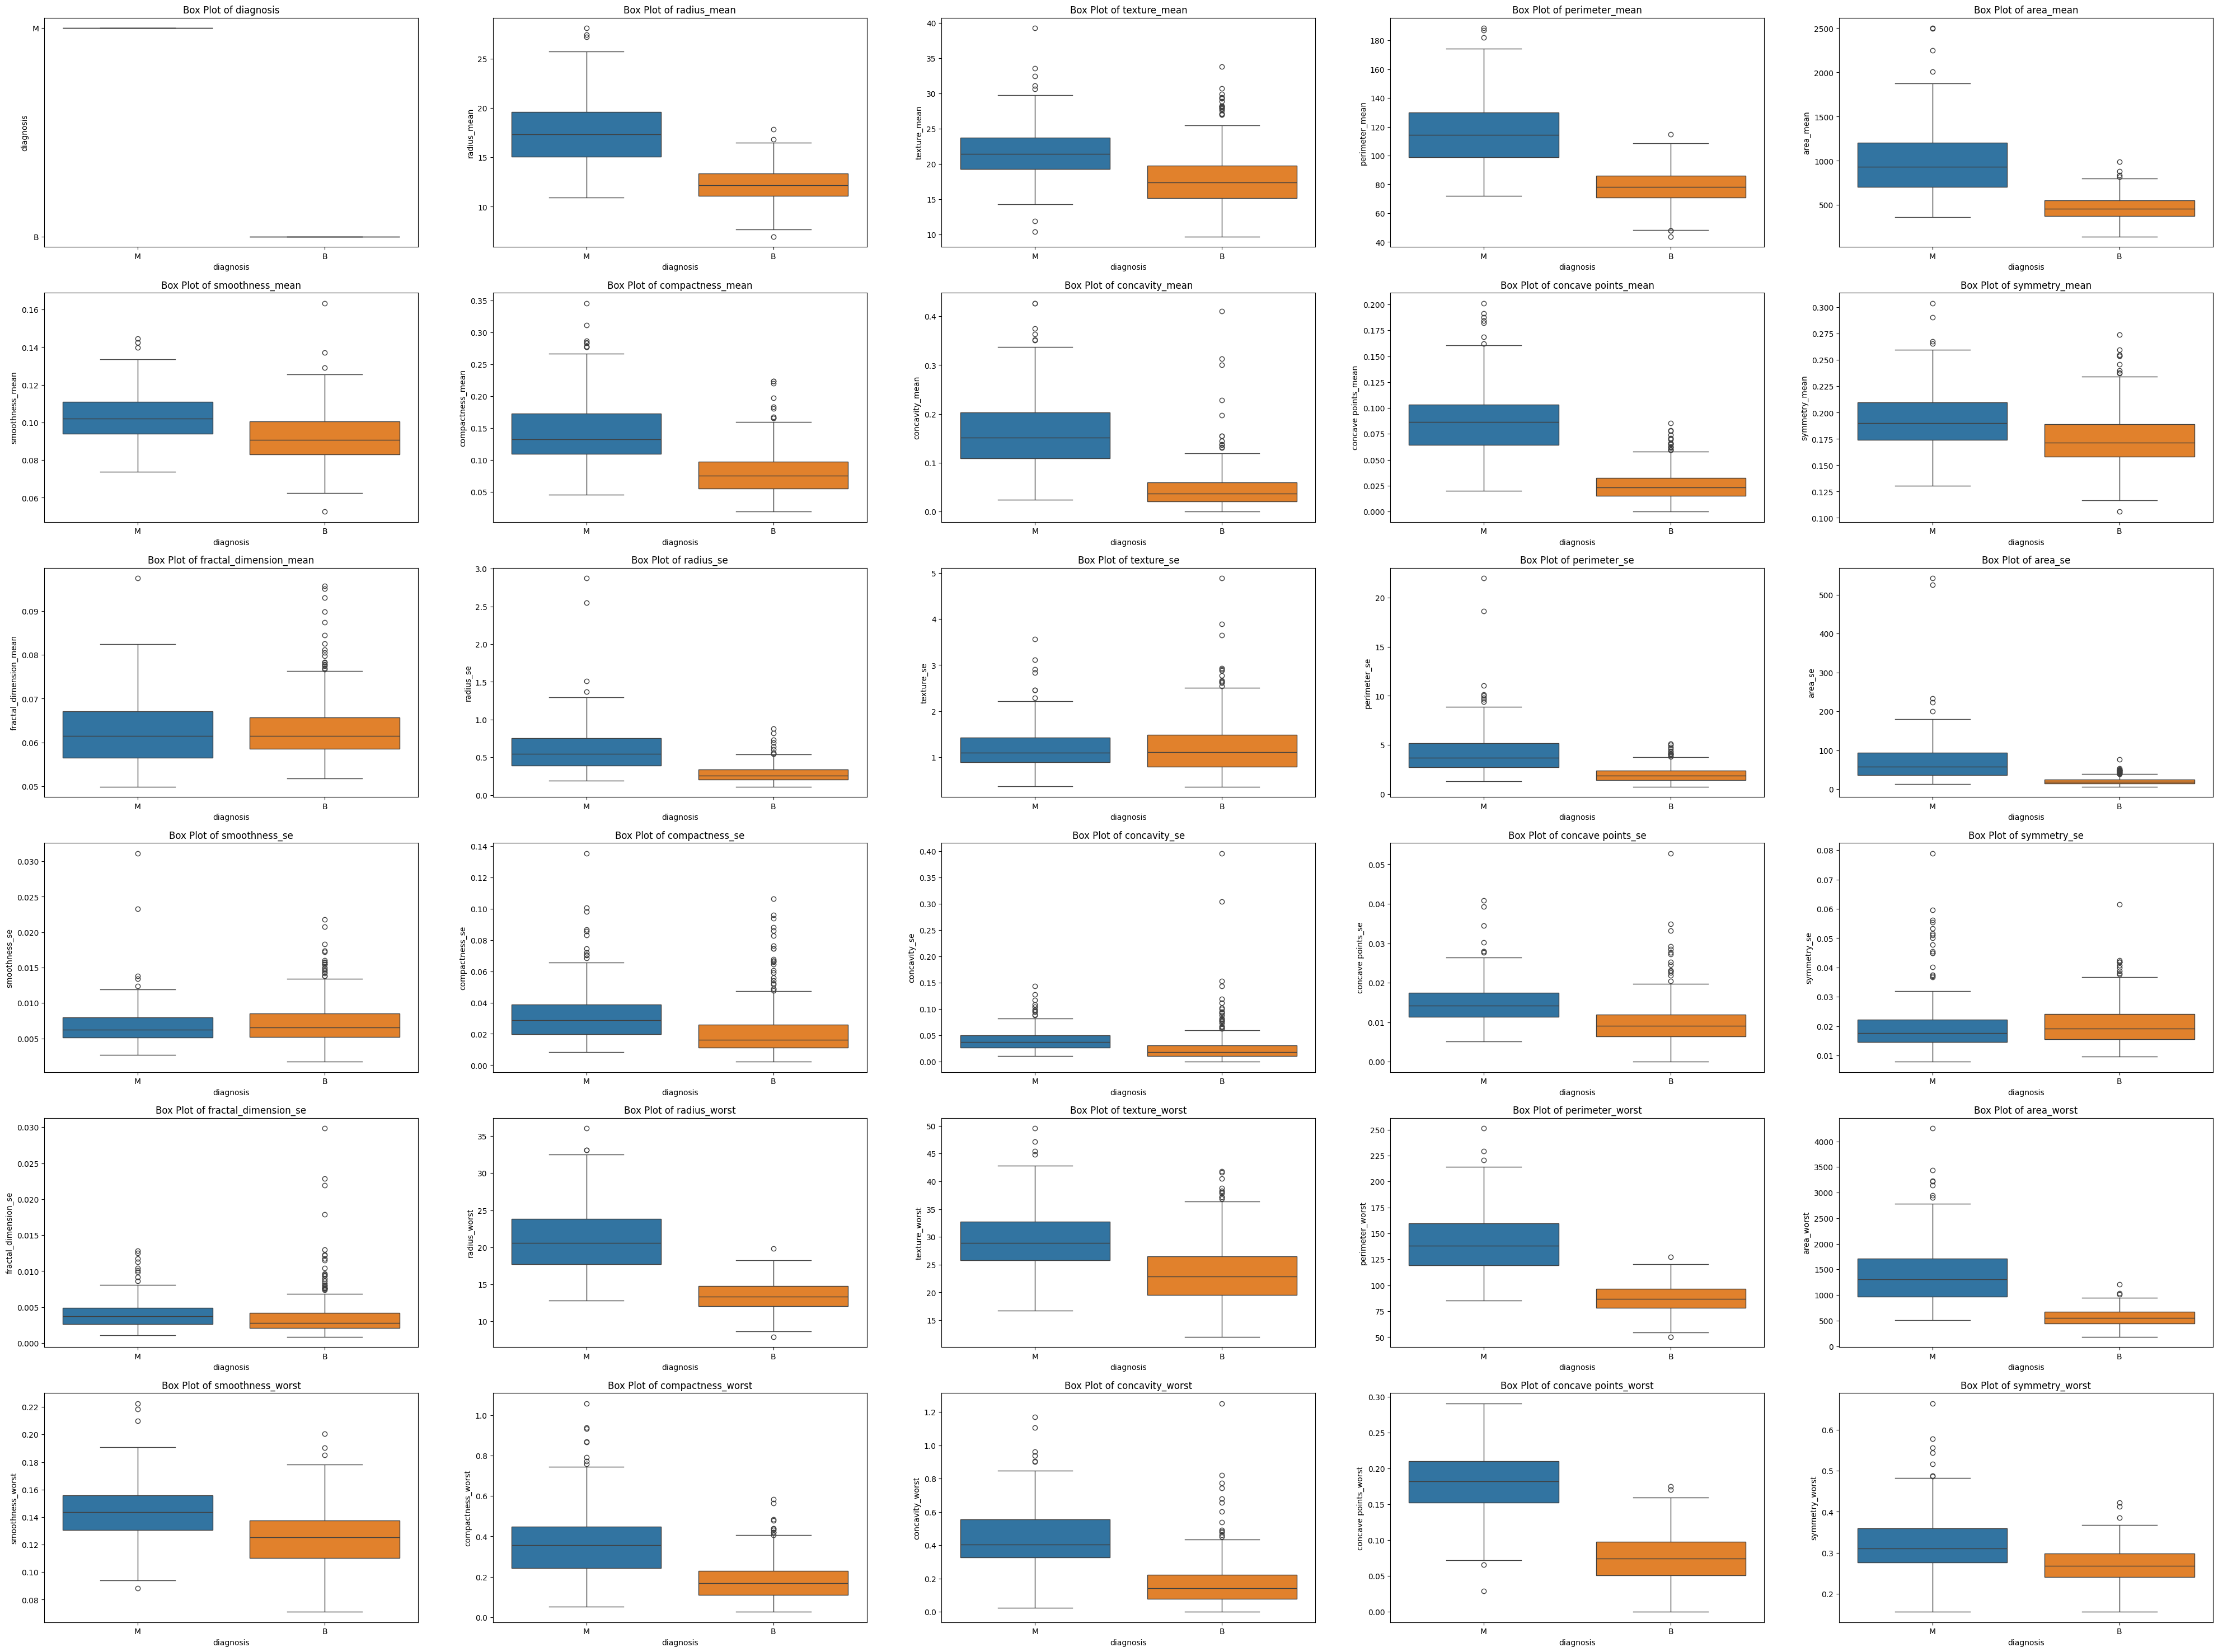

In [54]:
plt.figure(figsize=(50, 50))
for i, column in enumerate(df_new.columns[:-1], 1):
    plt.subplot(8, 5, i)
    sns.boxplot(x='diagnosis', y=column, hue='diagnosis', data=df_new)
    plt.title(f'Box Plot of {column}')

In [55]:
# checking for outliers

required_columns = df_new.drop(columns = 'diagnosis')

for i in required_columns:

    q1 = df_new[i].quantile(0.25)
    q3 = df_new[i].quantile(0.75)
    iqr = q3 - q1

    lower_whisker_value = q1 - 3.0 * iqr
    upper_whisker_value = q3 + 3.0 * iqr

    outliers_iqr = (df_new[i] < lower_whisker_value) | (df_new[i] > upper_whisker_value)

# Print indices of outliers
    print(f'{i} - Outliers:', outliers_iqr.sum())

radius_mean - Outliers: 1
texture_mean - Outliers: 1
perimeter_mean - Outliers: 0
area_mean - Outliers: 5
smoothness_mean - Outliers: 1
compactness_mean - Outliers: 1
concavity_mean - Outliers: 0
concave points_mean - Outliers: 0
symmetry_mean - Outliers: 1
fractal_dimension_mean - Outliers: 4
radius_se - Outliers: 7
texture_se - Outliers: 4
perimeter_se - Outliers: 12
area_se - Outliers: 22
smoothness_se - Outliers: 7
compactness_se - Outliers: 6
concavity_se - Outliers: 6
concave points_se - Outliers: 3
symmetry_se - Outliers: 9
fractal_dimension_se - Outliers: 11
radius_worst - Outliers: 0
texture_worst - Outliers: 0
perimeter_worst - Outliers: 1
area_worst - Outliers: 7
smoothness_worst - Outliers: 0
compactness_worst - Outliers: 3
concavity_worst - Outliers: 1
concave points_worst - Outliers: 0
symmetry_worst - Outliers: 4
fractal_dimension_worst - Outliers: 2


In [56]:
# Removing outliers
conditions = []
for feature in required_columns:
    Q1 = df_new[feature].quantile(0.25)
    Q3 = df_new[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    condition = (df_new[feature] >= lower_bound) & (df_new[feature] <= upper_bound)
    conditions.append(condition)

# Combine conditions using logical AND
combined_condition = np.logical_and.reduce(conditions)
df_cleaned = df_new[combined_condition]

In [57]:
df_cleaned

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
6,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
10,M,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.80,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452
11,M,15.78,17.89,103.60,781.0,0.09710,0.12920,0.09954,0.06606,0.1842,...,20.42,27.28,136.50,1299.0,0.1396,0.5609,0.3965,0.18100,0.3792,0.10480
13,M,15.85,23.95,103.70,782.7,0.08401,0.10020,0.09938,0.05364,0.1847,...,16.84,27.66,112.00,876.5,0.1131,0.1924,0.2322,0.11190,0.2809,0.06287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,B,12.88,28.92,82.50,514.3,0.08123,0.05824,0.06195,0.02343,0.1566,...,13.89,35.74,88.84,595.7,0.1227,0.1620,0.2439,0.06493,0.2372,0.07242
555,B,10.29,27.61,65.67,321.4,0.09030,0.07658,0.05999,0.02738,0.1593,...,10.84,34.91,69.57,357.6,0.1384,0.1710,0.2000,0.09127,0.2226,0.08283
558,B,14.59,22.68,96.39,657.1,0.08473,0.13300,0.10290,0.03736,0.1454,...,15.48,27.27,105.90,733.5,0.1026,0.3171,0.3662,0.11050,0.2258,0.08004
560,B,14.05,27.15,91.38,600.4,0.09929,0.11260,0.04462,0.04304,0.1537,...,15.30,33.17,100.20,706.7,0.1241,0.2264,0.1326,0.10480,0.2250,0.08321


In [58]:
for i in required_columns:

    q1 = df_cleaned[i].quantile(0.25)
    q3 = df_cleaned[i].quantile(0.75)
    iqr = q3 - q1

    lower_whisker_value = q1 - 3.0 * iqr
    upper_whisker_value = q3 + 3.0 * iqr

    outliers_iqr = (df_cleaned[i] < lower_whisker_value) | (df_cleaned[i] > upper_whisker_value)

# Print indices of outliers
    print(f'{i} - Outliers:', outliers_iqr.sum())

radius_mean - Outliers: 0
texture_mean - Outliers: 0
perimeter_mean - Outliers: 0
area_mean - Outliers: 0
smoothness_mean - Outliers: 0
compactness_mean - Outliers: 0
concavity_mean - Outliers: 0
concave points_mean - Outliers: 0
symmetry_mean - Outliers: 0
fractal_dimension_mean - Outliers: 0
radius_se - Outliers: 0
texture_se - Outliers: 0
perimeter_se - Outliers: 0
area_se - Outliers: 5
smoothness_se - Outliers: 0
compactness_se - Outliers: 0
concavity_se - Outliers: 0
concave points_se - Outliers: 0
symmetry_se - Outliers: 0
fractal_dimension_se - Outliers: 0
radius_worst - Outliers: 0
texture_worst - Outliers: 0
perimeter_worst - Outliers: 0
area_worst - Outliers: 3
smoothness_worst - Outliers: 0
compactness_worst - Outliers: 0
concavity_worst - Outliers: 0
concave points_worst - Outliers: 0
symmetry_worst - Outliers: 0
fractal_dimension_worst - Outliers: 0


In [59]:
# checking zeros count

zeros_count = (df_cleaned == 0).sum()

# Display the count of 0's for each column
print("Count of 0's in Each Column:")
print(zeros_count)

Count of 0's in Each Column:
diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             5
concave points_mean        5
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               5
concave points_se          5
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            5
concave points_worst       5
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64


### Feature Scaling

In [60]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

X = df_new.drop(columns='diagnosis')
y = df_new['diagnosis']


scaler = StandardScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)

In [61]:
# Balancing the target value distribution

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_scaled, y= smote.fit_resample(X_scaled, y)
y.value_counts()

,count
diagnosis,
M,357
B,357


### Dateset Splitting, Model Building and Evaluation

In [62]:
# model building
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report
from sklearn.neighbors import KNeighborsClassifier


X_val = X_scaled
Y_val = y

X_train, X_test, y_train, y_test = train_test_split(X_val,Y_val, test_size = 0.2, random_state = 42)

results = []

# Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_metrics = {
    'Model': 'Logistic Regression',
    'Test Accuracy': accuracy_score(y_test, lr_pred),
    'Train Accuracy': accuracy_score(y_train, lr_model.predict(X_train)),
    'Precision': precision_score(y_test, lr_pred, pos_label='M'),
    'Recall': recall_score(y_test, lr_pred, pos_label='M'),
    'F1 score': f1_score(y_test, lr_pred, pos_label='M'),
    'Train confusion matrix': confusion_matrix(y_train, lr_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, lr_pred)

}
results.append(lr_metrics)

# Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_metrics = {
    'Model': 'Random Forest',
    'Test Accuracy': accuracy_score(y_test, rf_pred),
    'Train Accuracy': accuracy_score(y_train, rf_model.predict(X_train)),
    'Precision': precision_score(y_test, rf_pred, pos_label='M'),
    'Recall': recall_score(y_test, rf_pred, pos_label='M'),
    'F1 score': f1_score(y_test, rf_pred, pos_label='M'),
    'Train confusion matrix': confusion_matrix(y_train, rf_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, rf_pred)

}
results.append(rf_metrics)

# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_metrics = {
    'Model': 'Decision Tree',
    'Test Accuracy': accuracy_score(y_test, dt_pred),
    'Train Accuracy': accuracy_score(y_train, dt_model.predict(X_train)),
    'Precision': precision_score(y_test, dt_pred, pos_label='M'),
    'Recall': recall_score(y_test, dt_pred, pos_label='M'),
    'F1 score': f1_score(y_test, dt_pred, pos_label='M'),
    'Train confusion matrix': confusion_matrix(y_train, dt_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, dt_pred)
}
results.append(dt_metrics)

#  KNN Classifier

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_metrics = {
    'Model': 'KNN Classifier',
    'Test Accuracy': accuracy_score(y_test, knn_pred),
    'Train Accuracy': accuracy_score(y_train, knn_model.predict(X_train)),
    'Precision': precision_score(y_test, knn_pred, pos_label='M'),
    'Recall': recall_score(y_test, knn_pred, pos_label='M'),
    'F1 score': f1_score(y_test, knn_pred, pos_label='M'),
    'Train confusion matrix': confusion_matrix(y_train, knn_model.predict(X_train)),
    'Test confusion matrix': confusion_matrix(y_test, knn_pred)
}
results.append(knn_metrics)


# Create DataFrame for results
results_df = pd.DataFrame(results)
results_df

,Model,Test Accuracy,Train Accuracy,Precision,Recall,F1 score,Train confusion matrix,Test confusion matrix
0,Logistic Regression,0.979021,0.985989,0.973333,0.986486,0.979866,"[[286, 2], [6, 277]]","[[67, 2], [1, 73]]"
1,Random Forest,0.972028,1.000000,0.972973,0.972973,0.972973,"[[288, 0], [0, 283]]","[[67, 2], [2, 72]]"
2,Decision Tree,0.958042,1.000000,0.959459,0.959459,0.959459,"[[288, 0], [0, 283]]","[[66, 3], [3, 71]]"
3,KNN Classifier,0.958042,0.989492,0.947368,0.972973,0.960000,"[[286, 2], [4, 279]]","[[65, 4], [2, 72]]"


<ipython-input-63-0aab644ec6bc>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Test Accuracy', data=accuracy_df, palette='viridis')


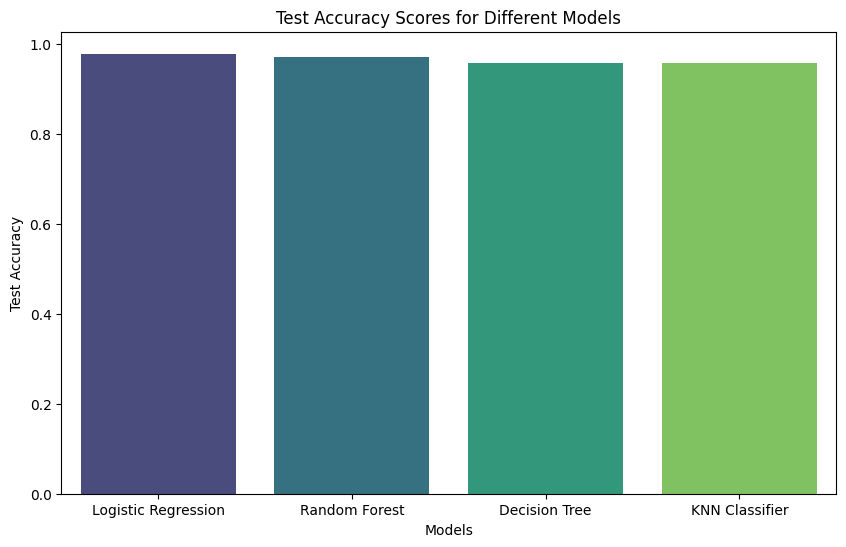

In [63]:
accuracy_data = {'Model': [result['Model'] for result in results],
                 'Test Accuracy': [result['Test Accuracy'] for result in results]}

accuracy_df = pd.DataFrame(accuracy_data)

# Plotting the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Test Accuracy', data=accuracy_df, palette='viridis')

# Adding labels and title
plt.title('Test Accuracy Scores for Different Models')
plt.xlabel('Models')
plt.ylabel('Test Accuracy')

# Show plot
plt.show()